In [ ]:
#Correan Young
#Spring 2025
#AI240
#This project uses a sample of sales data from amazon. The dataset included many columns however the columns I will be focusing on are ReviewContent and Ratings
#Using this data I will be predicting a product rating based on the words used in the review content.

In [ ]:
# This code imports libraies for the model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
#This code uploades the dataset into the model
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon (6).csv


In [ ]:
#This code reads the dataset to a pandas dataframe then assigns it to a variable
df = pd.read_csv('amazon.csv')

In [ ]:
#This code prints the information of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
#This code prints the shape of the dataframe
df.shape

(1465, 16)

In [ ]:
#This code prints the first 5 rows of the dataframe
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# This code uses feature selection to drop columns not necessary to our model
df = df.drop(columns= ['product_id', 'user_id', 'user_name','review_id','img_link','product_link'])

In [ ]:
#This code prints the shape of the new dataframe, information and first 20 rows

In [ ]:
#This code prints the shape of the new dataframe, information and first 20 rows
df.shape

(1465, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_name         1465 non-null   object
 1   category             1465 non-null   object
 2   discounted_price     1465 non-null   object
 3   actual_price         1465 non-null   object
 4   discount_percentage  1465 non-null   object
 5   rating               1465 non-null   object
 6   rating_count         1463 non-null   object
 7   about_product        1465 non-null   object
 8   review_title         1465 non-null   object
 9   review_content       1465 non-null   object
dtypes: object(10)
memory usage: 114.6+ KB


In [ ]:
df.head(20)

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."
5,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron..."
6,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...
7,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,₹229,₹299,23%,4.3,"30,411",1m long Type-C USB Cable|Sturdy and Durable. W...,"Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......
8,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,₹499,₹999,50%,4.2,"1,79,691",USB WiFi Adapter —— Speedy wireless transmissi...,Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...
9,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹299,33%,4.0,"43,994",Universal Compatibility – It is compatible wit...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...


In [ ]:
# This code converts columns from object data types to string
df['ProductName'] = df['product_name'].astype('string')

In [ ]:
print(df['ProductName'].dtype)

string


In [ ]:
df['Category'] = df['category'].astype('string')

In [ ]:
print(df['Category'].dtype)

string


In [ ]:
df['AboutProduct'] = df['about_product'].astype('string')

In [ ]:
print(df['AboutProduct'].dtype)

string


In [ ]:
df['ReviewTitle'] = df['review_title'].astype('string')

In [ ]:
print(df['ReviewTitle'].dtype)

string


In [ ]:
df['ReviewContent'] = df['review_content'].astype('string')

In [ ]:
print(df['ReviewContent'].dtype)

string


In [ ]:
# The series of code below explores the numberical columns to prepare them to be converted
pd.to_numeric(df['rating'], errors='coerce')

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2
...,...
1460,4.0
1461,4.1
1462,3.6
1463,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_name         1465 non-null   object
 1   category             1465 non-null   object
 2   discounted_price     1465 non-null   object
 3   actual_price         1465 non-null   object
 4   discount_percentage  1465 non-null   object
 5   rating               1465 non-null   object
 6   rating_count         1463 non-null   object
 7   about_product        1465 non-null   object
 8   review_title         1465 non-null   object
 9   review_content       1465 non-null   object
 10  ProductName          1465 non-null   string
 11  Category             1465 non-null   string
 12  AboutProduct         1465 non-null   string
 13  ReviewTitle          1465 non-null   string
 14  ReviewContent        1465 non-null   string
dtypes: object(10), string(5)
memory usage: 171.8+ KB


In [ ]:
df = df.drop(columns= ['product_name', 'category', 'about_product', 'review_title', 'review_content'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   discounted_price     1465 non-null   object
 1   actual_price         1465 non-null   object
 2   discount_percentage  1465 non-null   object
 3   rating               1465 non-null   object
 4   rating_count         1463 non-null   object
 5   ProductName          1465 non-null   string
 6   Category             1465 non-null   string
 7   AboutProduct         1465 non-null   string
 8   ReviewTitle          1465 non-null   string
 9   ReviewContent        1465 non-null   string
dtypes: object(5), string(5)
memory usage: 114.6+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   discounted_price     1463 non-null   object
 1   actual_price         1463 non-null   object
 2   discount_percentage  1463 non-null   object
 3   rating               1463 non-null   object
 4   rating_count         1463 non-null   object
 5   ProductName          1463 non-null   string
 6   Category             1463 non-null   string
 7   AboutProduct         1463 non-null   string
 8   ReviewTitle          1463 non-null   string
 9   ReviewContent        1463 non-null   string
dtypes: object(5), string(5)
memory usage: 125.7+ KB


In [ ]:
print(df['rating'].unique())

['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']


In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [ ]:
print(df['rating'].unique())

[4.2 4.  3.9 4.1 4.3 4.4 4.5 3.7 3.3 3.6 3.4 3.8 3.5 4.6 3.2 5.  4.7 3.
 2.8 3.1 4.8 2.3 nan 2.  2.6 2.9]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1463 non-null   object 
 1   actual_price         1463 non-null   object 
 2   discount_percentage  1463 non-null   object 
 3   rating               1462 non-null   float64
 4   rating_count         1463 non-null   object 
 5   ProductName          1463 non-null   string 
 6   Category             1463 non-null   string 
 7   AboutProduct         1463 non-null   string 
 8   ReviewTitle          1463 non-null   string 
 9   ReviewContent        1463 non-null   string 
dtypes: float64(1), object(4), string(5)
memory usage: 125.7+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df['rating'].unique())

[4.2 4.  3.9 4.1 4.3 4.4 4.5 3.7 3.3 3.6 3.4 3.8 3.5 4.6 3.2 5.  4.7 3.
 2.8 3.1 4.8 2.3 2.  2.6 2.9]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1462 non-null   object 
 1   actual_price         1462 non-null   object 
 2   discount_percentage  1462 non-null   object 
 3   rating               1462 non-null   float64
 4   rating_count         1462 non-null   object 
 5   ProductName          1462 non-null   string 
 6   Category             1462 non-null   string 
 7   AboutProduct         1462 non-null   string 
 8   ReviewTitle          1462 non-null   string 
 9   ReviewContent        1462 non-null   string 
dtypes: float64(1), object(4), string(5)
memory usage: 125.6+ KB


In [ ]:
df['rating_count'].unique()

array(['24,269', '43,994', '7,928', ..., '468', '8,031', '6,987'],
      dtype=object)

In [ ]:
df['rating_count'] = df['rating_count'].str.replace(',', '')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1462 non-null   object 
 1   actual_price         1462 non-null   object 
 2   discount_percentage  1462 non-null   object 
 3   rating               1462 non-null   float64
 4   rating_count         1462 non-null   object 
 5   ProductName          1462 non-null   string 
 6   Category             1462 non-null   string 
 7   AboutProduct         1462 non-null   string 
 8   ReviewTitle          1462 non-null   string 
 9   ReviewContent        1462 non-null   string 
dtypes: float64(1), object(4), string(5)
memory usage: 125.6+ KB


In [ ]:
df['DiscountedPrice'] = df['discounted_price'].replace({'₹': '',',': '' }, regex=True)

In [ ]:
df['DiscountedPrice'].unique()

array(['399', '199', '329', '154', '149', '176.63', '229', '499', '299',
       '219', '350', '159', '349', '13999', '249', '13490', '970', '279',
       '59', '11499', '14999', '179', '389', '599', '99', '899', '32999',
       '209', '19999', '999', '333', '507', '309', '1199', '799', '6999',
       '230', '649', '15999', '348', '32990', '139', '263', '7999',
       '1599', '26999', '115', '10901', '1434', '7299', '325', '29999',
       '27999', '30990', '269', '24999', '18990', '290', '345', '1099',
       '719', '849', '21999', '449', '37999', '7390', '273.10', '15990',
       '210', '1299', '347', '228', '1499', '8499', '20990', '9999',
       '489', '23999', '689', '1699', '655', '749', '195', '416', '368',
       '29990', '339', '15490', '9490', '637', '1089', '12499', '1399',
       '88', '57.89', '205', '949', '379', '8990', '486', '5699', '709',
       '47990', '320', '129', '225', '547', '259', '239', '467', '11990',
       '252', '204', '6490', '235', '42999', '173', '848.99

In [ ]:
df['ActualPrice'] = df['actual_price'].replace({'₹': '',',':''}, regex=True)

In [ ]:
df['ActualPrice'].unique()

array(['1099', '349', '1899', '699', '399', '1000', '499', '299', '999',
       '339', '799', '700', '899', '24999', '21990', '1799', '22900',
       '199', '19990', '19999', '1999', '750', '599', '666.66', '1900',
       '45999', '695', '34999', '1599', '1208', '475', '395', '2199',
       '500', '2100', '12999', '1399', '21999', '1499', '47900', '845',
       '1400', '14990', '2999', '42999', '30990', '3999', '249', '19125',
       '1299', '39999', '40990', '52900', '800', '31999', '1809', '29999',
       '65000', '20000', '23990', '15999', '44990', '44999', '1700',
       '595', '27990', '1200', '34990', '1500', '49990', '931', '2399',
       '1339', '20900', '15990', '1600', '849', '1199', '22990', '2499',
       '47990', '485', '18990', '11000', '70900', '549', '35999', '1699',
       '31990', '9990', '16990', '59999', '600', '1490', '2299', '4999',
       '1749', '1100', '49999', '56790', '795', '798', '995', '139900',
       '85000', '758', '4699', '24990', '650', '3100', '18999

In [ ]:
#This code converts the object Dtypes to integer
df['RatingCount'] = df['rating_count'].astype('int64')

In [ ]:
df['DiscountedPrice'] = df['DiscountedPrice'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1462 non-null   object 
 1   actual_price         1462 non-null   object 
 2   discount_percentage  1462 non-null   object 
 3   rating               1462 non-null   float64
 4   rating_count         1462 non-null   object 
 5   ProductName          1462 non-null   string 
 6   Category             1462 non-null   string 
 7   AboutProduct         1462 non-null   string 
 8   ReviewTitle          1462 non-null   string 
 9   ReviewContent        1462 non-null   string 
 10  DiscountedPrice      1462 non-null   float64
 11  ActualPrice          1462 non-null   object 
 12  RatingCount          1462 non-null   int64  
dtypes: float64(2), int64(1), object(5), string(5)
memory usage: 159.9+ KB


In [ ]:
df['ActualPrice'] = df['ActualPrice'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1462 non-null   object 
 1   actual_price         1462 non-null   object 
 2   discount_percentage  1462 non-null   object 
 3   rating               1462 non-null   float64
 4   rating_count         1462 non-null   object 
 5   ProductName          1462 non-null   string 
 6   Category             1462 non-null   string 
 7   AboutProduct         1462 non-null   string 
 8   ReviewTitle          1462 non-null   string 
 9   ReviewContent        1462 non-null   string 
 10  DiscountedPrice      1462 non-null   float64
 11  ActualPrice          1462 non-null   float64
 12  RatingCount          1462 non-null   int64  
dtypes: float64(3), int64(1), object(4), string(5)
memory usage: 159.9+ KB


In [ ]:
df = df.drop(columns= ['rating_count'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1462 non-null   object 
 1   actual_price         1462 non-null   object 
 2   discount_percentage  1462 non-null   object 
 3   rating               1462 non-null   float64
 4   ProductName          1462 non-null   string 
 5   Category             1462 non-null   string 
 6   AboutProduct         1462 non-null   string 
 7   ReviewTitle          1462 non-null   string 
 8   ReviewContent        1462 non-null   string 
 9   DiscountedPrice      1462 non-null   float64
 10  ActualPrice          1462 non-null   float64
 11  RatingCount          1462 non-null   int64  
dtypes: float64(3), int64(1), object(3), string(5)
memory usage: 148.5+ KB


In [ ]:
df = df.drop(columns =['discounted_price', 'actual_price'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discount_percentage  1462 non-null   object 
 1   rating               1462 non-null   float64
 2   ProductName          1462 non-null   string 
 3   Category             1462 non-null   string 
 4   AboutProduct         1462 non-null   string 
 5   ReviewTitle          1462 non-null   string 
 6   ReviewContent        1462 non-null   string 
 7   DiscountedPrice      1462 non-null   float64
 8   ActualPrice          1462 non-null   float64
 9   RatingCount          1462 non-null   int64  
dtypes: float64(3), int64(1), object(1), string(5)
memory usage: 125.6+ KB


In [ ]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')

In [ ]:
df['DiscountPercentage'] = df['discount_percentage'].astype('float')

In [ ]:
df['DiscountPercentage'] = df['DiscountPercentage']/100

In [ ]:
df['DiscountPercentage'].unique()

array([0.64, 0.43, 0.9 , 0.53, 0.61, 0.85, 0.65, 0.23, 0.5 , 0.33, 0.55,
       0.63, 0.69, 0.6 , 0.13, 0.44, 0.38, 0.39, 0.46, 0.41, 0.7 , 0.42,
       0.72, 0.25, 0.51, 0.73, 0.  , 0.8 , 0.28, 0.67, 0.58, 0.35, 0.45,
       0.62, 0.54, 0.27, 0.77, 0.56, 0.78, 0.31, 0.86, 0.47, 0.37, 0.75,
       0.32, 0.68, 0.66, 0.22, 0.57, 0.17, 0.52, 0.88, 0.2 , 0.59, 0.4 ,
       0.26, 0.29, 0.83, 0.71, 0.15, 0.76, 0.48, 0.82, 0.36, 0.89, 0.87,
       0.24, 0.34, 0.11, 0.91, 0.07, 0.19, 0.79, 0.21, 0.81, 0.18, 0.49,
       0.3 , 0.84, 0.1 , 0.06, 0.14, 0.74, 0.04, 0.05, 0.16, 0.08, 0.02,
       0.94, 0.12, 0.03, 0.09])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discount_percentage  1462 non-null   object 
 1   rating               1462 non-null   float64
 2   ProductName          1462 non-null   string 
 3   Category             1462 non-null   string 
 4   AboutProduct         1462 non-null   string 
 5   ReviewTitle          1462 non-null   string 
 6   ReviewContent        1462 non-null   string 
 7   DiscountedPrice      1462 non-null   float64
 8   ActualPrice          1462 non-null   float64
 9   RatingCount          1462 non-null   int64  
 10  DiscountPercentage   1462 non-null   float64
dtypes: float64(4), int64(1), object(1), string(5)
memory usage: 137.1+ KB


In [ ]:
df = df.drop(columns= ['discount_percentage'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              1462 non-null   float64
 1   ProductName         1462 non-null   string 
 2   Category            1462 non-null   string 
 3   AboutProduct        1462 non-null   string 
 4   ReviewTitle         1462 non-null   string 
 5   ReviewContent       1462 non-null   string 
 6   DiscountedPrice     1462 non-null   float64
 7   ActualPrice         1462 non-null   float64
 8   RatingCount         1462 non-null   int64  
 9   DiscountPercentage  1462 non-null   float64
dtypes: float64(4), int64(1), string(5)
memory usage: 125.6 KB


In [ ]:
df.head(10)

,rating,ProductName,Category,AboutProduct,ReviewTitle,ReviewContent,DiscountedPrice,ActualPrice,RatingCount,DiscountPercentage
0,4.2,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,399.00,1099.0,24269,0.64
1,4.0,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,199.00,349.0,43994,0.43
2,3.9,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",199.00,1899.0,7928,0.90
3,4.2,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",329.00,699.0,94363,0.53
4,4.2,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",154.00,399.0,16905,0.61
5,3.9,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Fast Charging & Data Sync: Solero TB301 Type-C...,"It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",149.00,1000.0,24871,0.85
6,4.1,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,It Ensures High Speed Transmission And Chargin...,"Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,176.63,499.0,15188,0.65
7,4.3,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,1m long Type-C USB Cable|Sturdy and Durable. W...,"Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,229.00,299.0,30411,0.23
8,4.2,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,USB WiFi Adapter —— Speedy wireless transmissi...,Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,499.00,999.0,179691,0.50
9,4.0,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,Universal Compatibility – It is compatible wit...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,199.00,299.0,43994,0.33


In [ ]:
df.rename(columns={'DiscountedPrice': 'DiscountedPrice_inr'}, inplace=True)

In [ ]:
df.rename(columns={'ActualPrice': 'ActualPrice_inr'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rating               1462 non-null   float64
 1   ProductName          1462 non-null   string 
 2   Category             1462 non-null   string 
 3   AboutProduct         1462 non-null   string 
 4   ReviewTitle          1462 non-null   string 
 5   ReviewContent        1462 non-null   string 
 6   DiscountedPrice_inr  1462 non-null   float64
 7   ActualPrice_inr      1462 non-null   float64
 8   RatingCount          1462 non-null   int64  
 9   DiscountPercentage   1462 non-null   float64
dtypes: float64(4), int64(1), string(5)
memory usage: 125.6 KB


In [ ]:
# This code cleans up the ReviewContent column
df['ReviewContent'] = df['ReviewContent'].str.lower().str.replace('[^\w\s]', '', regex=True).str.replace('\d+', '', regex=True)

In [ ]:
#The code below imports TfidfVectorizer which turns text into features
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [ ]:
#The code below saves the data to the vectorized to the variables and splits the data into train test splits and fits the data to the model
X = vectorizer.fit_transform(df['ReviewContent'])
y= df['rating']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Ridge()
model.fit(Xtrain, ytrain)

Ridge()

In [ ]:
#This code predicts the values and calcukates the Mean Squared Error and R2 Score
ypred = model.predict(Xtest)

print('Mean Squared Error:', mean_squared_error(ytest, ypred))
print('R2 Score:', r2_score(ytest, ypred))

Mean Squared Error: 0.06908440671692309
R2 Score: 0.15545358031454204


In [ ]:
print(ypred)

[4.33186996 4.2122263  3.89645429 4.5226547  3.93378233 4.23681699
 4.16528444 4.19983763 4.58404845 4.14480418 4.26230387 4.0093595
 4.20089229 3.98361018 4.13882126 4.164615   4.31421032 3.82084496
 3.88376163 4.01158043 4.035574   4.08223685 4.0529145  3.87741495
 4.20268587 4.21038842 4.04819103 3.76424747 4.14949691 4.17506353
 4.33183875 4.0155023  4.06368603 3.94794074 4.04554294 4.15768687
 4.02028425 4.16398383 4.21759449 4.27771458 4.13642555 3.64054708
 3.85703461 4.34735146 3.96000586 3.96787761 4.0505322  4.13642555
 4.30612588 3.98748203 3.9770226  4.13518939 3.69437277 4.13988939
 3.94847317 4.33186996 4.03089009 4.08578444 4.5226547  4.12555827
 4.28287321 4.04377443 4.36020208 3.91148818 4.1386083  4.08183532
 4.03165158 4.03518085 4.0417895  4.05420366 3.90692504 3.94822052
 4.0769626  4.1323101  4.17942827 4.36020208 3.94794074 3.82047481
 4.05801832 4.33532141 4.10627321 3.84876026 4.10108337 4.10496135
 4.07688052 4.29859567 4.31421032 4.30612588 4.03965327 4.06490

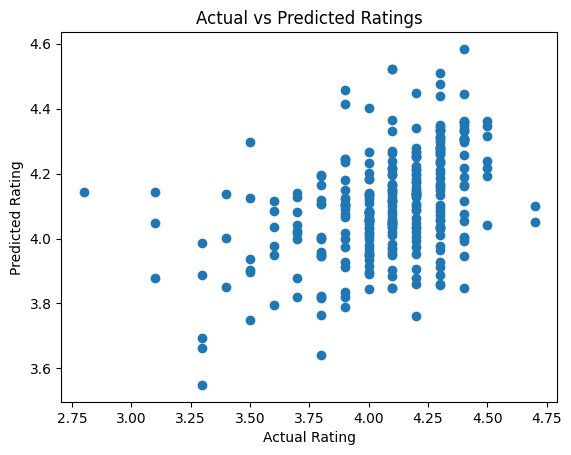

In [ ]:
#This code creates a scatter plot of the Actual Ratings vs Predicted Ratings
plt.scatter(ytest, ypred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')
plt.show()

In [ ]:
#This code scores the model
model.score(Xtest, ytest)

0.15545358031454204

In [ ]:
##The code below imports the Multinomial Naieve Bayes model
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#This code creates bins for the ratings to tranform the data from continous to discrete values
bins = [0, 1.5, 2.5, 3.5, 4.5, 5.0]
labels = [1, 2, 3, 4, 5]

In [ ]:
df['RatingBinned'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
#Code that shows the actual ratings vs their bins
print(df[['rating', 'RatingBinned']].head(15))

    rating RatingBinned
0      4.2            4
1      4.0            4
2      3.9            4
3      4.2            4
4      4.2            4
5      3.9            4
6      4.1            4
7      4.3            4
8      4.2            4
9      4.0            4
10     4.3            4
11     4.2            4
12     4.4            4
13     4.2            4
14     4.1            4


In [ ]:
#This code below saves the vectorized review content to a new variable so it doesn't affect the previous model then splits
#the data in to train and test values
x = vectorizer.fit_transform(df['ReviewContent'])
y = df['RatingBinned'].astype(int)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Code below initializes the model and fits the data
Mod = MultinomialNB()
Mod.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Code that Predicts the values
y_pred = Mod.predict(x_test)

In [ ]:
print(y_pred)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
#Code that displays the confusion matrix

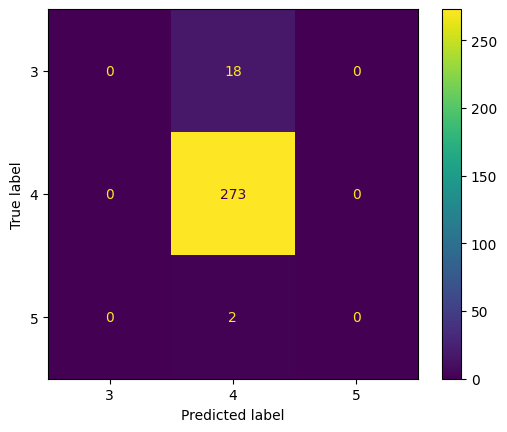

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(df['RatingBinned'].unique())

[4, 3, 5, 2]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [ ]:
#Code below scores the model

In [ ]:

Mod.score(x_test, y_test)

0.931740614334471

In [ ]:
#This code imports Decision Tree  to create a model

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
df.describe()

,rating,DiscountedPrice_inr,ActualPrice_inr,RatingCount,DiscountPercentage
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,4.096717,3129.981826,5453.087743,18307.376881,0.476724
std,0.289497,6950.548042,10884.467444,42766.096572,0.216139
min,2.000000,39.000000,39.000000,2.000000,0.000000
25%,4.000000,325.000000,800.000000,1191.500000,0.320000
50%,4.100000,799.000000,1670.000000,5179.000000,0.500000
75%,4.300000,1999.000000,4321.250000,17342.250000,0.630000
max,5.000000,77990.000000,139900.000000,426973.000000,0.940000


In [ ]:
#Code that creates a distribution plot of the ratings

<Axes: xlabel='rating', ylabel='Density'>

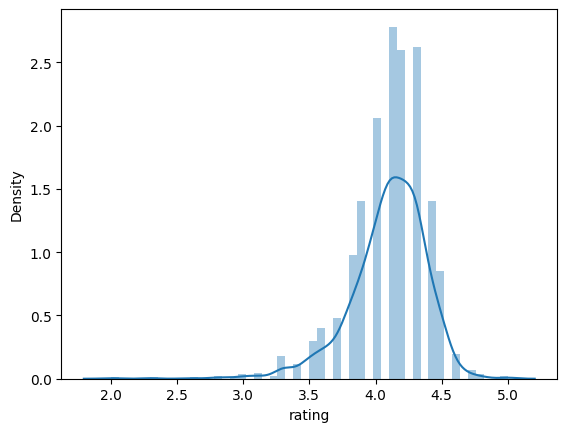

In [ ]:
sns.distplot(df['rating'])

In [ ]:
#Code that initializes the Decison Tree Classifier

In [ ]:
TreeMod = DecisionTreeClassifier(max_depth=5,
                                 ccp_alpha=0.01,
                                 criterion = 'entropy',
                                 random_state= 42,
                                 min_samples_leaf=5,
                                 min_samples_split=10)
TreeMod.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
#Code that predicts the rating values

In [ ]:
pred_y = TreeMod.predict(X)

In [ ]:
print(pred_y)

[4 4 4 ... 4 4 4]


In [ ]:
#Code that scores the model

In [ ]:
TreeMod.score(X, y)

0.9357045143638851

In [ ]:
#Code that plots the decision tree

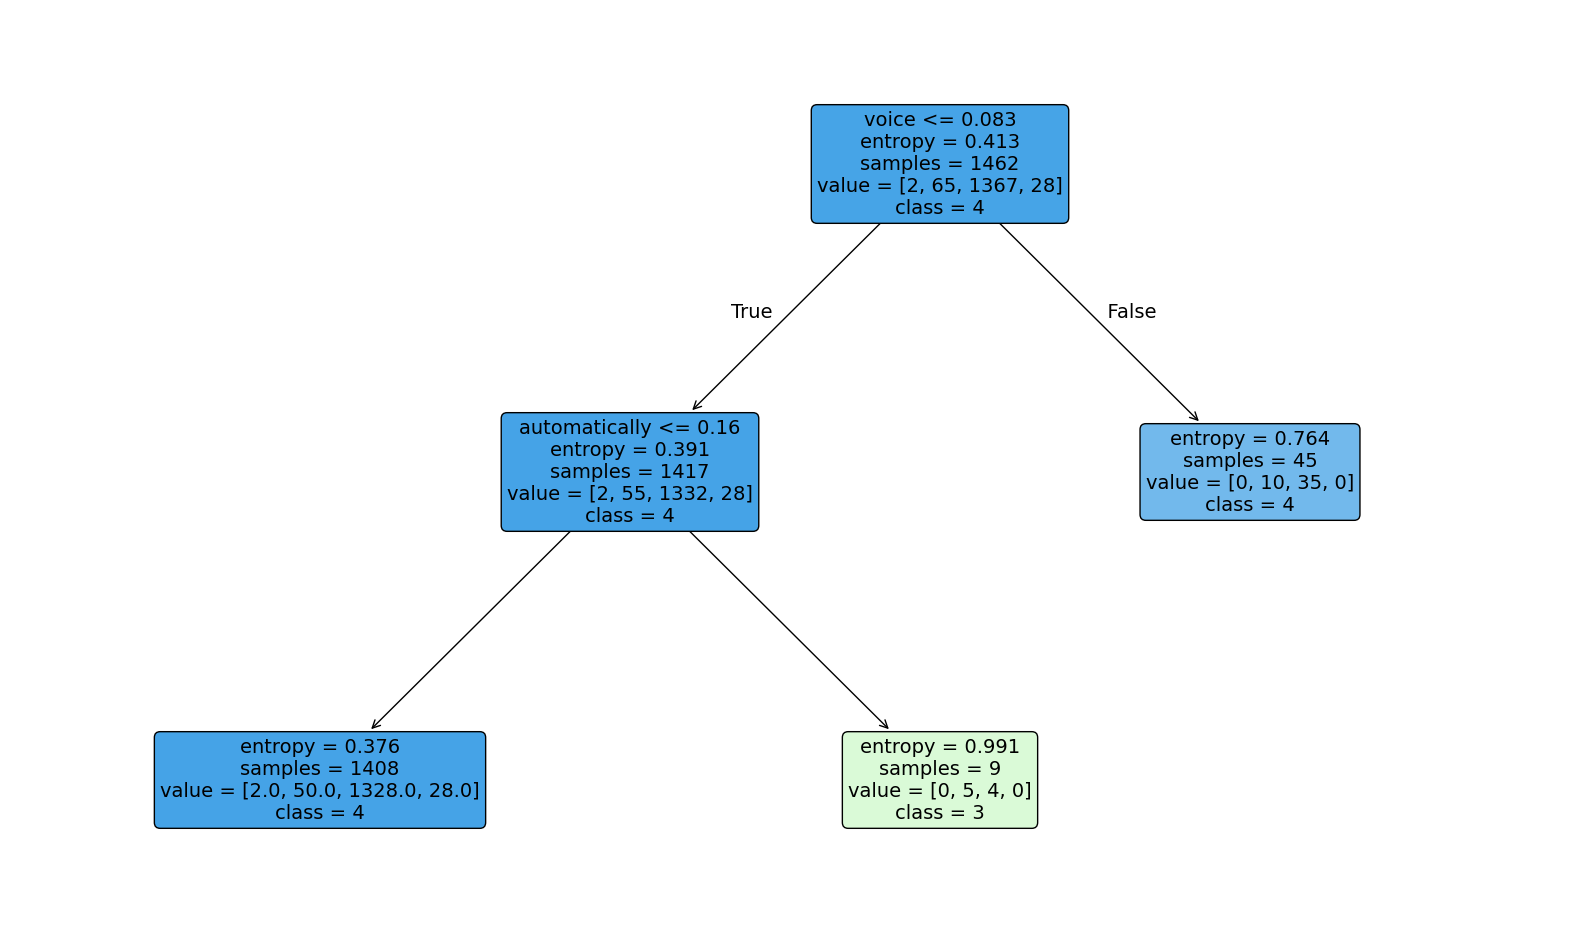

In [ ]:
plt.figure(figsize=(20, 12))
plot_tree(
    TreeMod,
    filled=True,
    rounded=True,
    class_names=[str(cls) for cls in TreeMod.classes_],
    feature_names=vectorizer.get_feature_names_out(),
    fontsize=14
)
plt.show()